In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


#공용함수

In [2]:
# 수정금지: 타임스탬프용 함수
from datetime import datetime
def printt(*args,**kwargs):
  now = datetime.now()
  now_str = "{:02}:{:02}:{:02}".format(now.hour,now.minute,now.second)
  print(now_str, *args,**kwargs)
  return int(now.hour)*60*60+int(now.minute)*60+int(now.second)

#연관 패키지 설치 (다른작업 금지)

In [3]:
#TODO: 해당 블럭에 패키지 설치하세요.
!pip install attrdict
!pip install transformers
!pip install seqeval
!pip install fastprogress

     |████████████████████████████████| 2.6 MB 7.6 MB/s 
     |████████████████████████████████| 895 kB 36.9 MB/s 
     |████████████████████████████████| 3.3 MB 61.6 MB/s 
     |████████████████████████████████| 636 kB 56.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 43 kB 2.4 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=d7ba4708d9d7f44a472cea4def1b62d19d21fd17e7b17ad18e502043b2bdfdf3
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


# 파일로딩 (다른작업 금지)

In [ ]:
#TODO: 해당 블럭에 필요 파일 로딩 코드 넣으시오.


# 모델 학습

In [4]:
# 수정금지: 타임스탬프
_model_build_start_time = printt("Model building: Start")
_model_build_start_time

08:34:48 Model building: Start


30888

In [ ]:
#TODO: 블럭에 모델 학습 - 빌딩 코드를 넣으세요. (시간측정 구간)





In [35]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,305 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

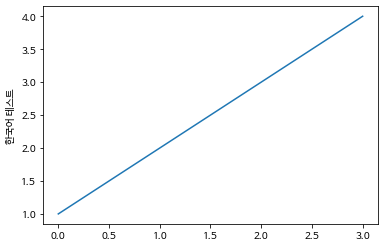

In [1]:
# 실행 전 런타임 다시시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.plot([1, 2, 3, 4])
plt.ylabel('한국어 테스트')
plt.show()

In [2]:
task = 'classification'
train_file = 'train_cls.txt'
test_file = 'evaluation_cls.txt'
full_text = 'full_text.txt'

# task = 'sentiment'
# train_file = train_s_cls.txt
# test_file = test_s_cls.txt

In [6]:
# initialize logging
import logging

logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
    datefmt="%m/%d/%Y %H:%M:%S",
    level=logging.INFO,
)

In [7]:
# make Input Example
class InputExample(object):
    """
    A single training/test example for simple sequence classification.
    """

    def __init__(self, guid, text_a, text_b, label):
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

    def __repr__(self):
        return str(self.to_json_string())

    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"
        
# make Input Feature
class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, attention_mask, token_type_ids, label):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.token_type_ids = token_type_ids
        self.label = label

    def __repr__(self):
        return str(self.to_json_string())

    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"

# make processor
class Processor(object):

    def __init__(self, args):
        self.args = args

    def get_labels(self):
        # return ['None', '상담원', '상담시스템', '고객서비스', '혜택', '할부금융상품', '커뮤니티서비스',
        #         '카드이용/결제', '카드상품', '청구입금', '심사/한도', '생활편의서비스', '상담/채널', '리스렌탈상품',
        #         '라이프서비스', '금융상품', '고객정보관리', '가맹점매출/승인', '가맹점대금', '가맹점계약', '삼성카드', '기타']
        return ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                '13', '14', '15', '16']

    def _read_file(cls, input_file):
        """Reads a tab separated value file."""
        with open(input_file, "r", encoding="utf-8") as f:
            lines = []
            for line in f:
                lines.append(line.strip())
            return lines

    def _create_examples(self, lines, set_type):
        """Creates examples for the training and dev sets."""
        examples = []
        for (i, line) in enumerate(lines[0:]):
            line = line.split("\t")
            guid = "%s-%s" % (set_type, i)
            text_a = line[0]
            label = line[1]
            if i % 10000 == 0:
                logger.info(line)
            examples.append(InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
        return examples

    def get_examples(self, mode):
        """
        Args:
            mode: train, test
        """
        file_to_read = None
        if mode == "train":
            file_to_read = self.args.train_file
        elif mode == "test":
            file_to_read = self.args.test_file

        logger.info("LOOKING AT {}".format(os.path.join(self.args.data_dir, file_to_read)))
        return self._create_examples(
            self._read_file(os.path.join(self.args.data_dir, file_to_read)), mode
        )

In [15]:
# set config args for classification
from transformers import (
    ElectraConfig,
    ElectraTokenizer,
    ElectraForSequenceClassification,
)
from attrdict import AttrDict
args = AttrDict(
    {
                 'data_dir': 'data',
                 'train_file': train_file,
                 'test_file': test_file,
                 'task': task,
                 'config': ElectraConfig,
                 'tokenizer': ElectraTokenizer,
                 'model': ElectraForSequenceClassification,
                 'evaluate_test_during_training': True, 
                 'eval_all_checkpoints': True, 
                 'save_optimizer': False, 
                 'do_lower_case': False, 
                 'do_train': True, 
                 'do_eval': True, 
                 'max_seq_len': 128, 
                 'num_train_epochs': 10, 
                 'weight_decay': 0.0, 
                 'gradient_accumulation_steps': 1, 
                 'adam_epsilon': 1e-08, 
                 'warmup_proportion': 0, 
                 'max_steps': -1, 
                 'max_grad_norm': 1.0, 
                 'no_cuda': False, 
                 'model_type': 'koelectra-base-v3', 
                 'model_name_or_path': 'monologg/koelectra-base-v3-discriminator', 
                 'output_dir': 'checkpoints', 
                 'seed': 42, 
                 'train_batch_size': 32, 
                 'eval_batch_size': 128, 
                 'logging_steps': 250, 
                 'save_steps': 250, 
                 'learning_rate': 5e-05
     }
)


In [8]:
import torch

# set seed
torch.cuda.manual_seed_all(args.seed)

processor = Processor(args)
labels = processor.get_labels()


config = args.config.from_pretrained(
            args.model_name_or_path,
            num_labels=len(labels)
            # id2label={str(i): label for i, label in enumerate(labels)},
            # label2id={label: i for i, label in enumerate(labels)},
        )
tokenizer = args.tokenizer.from_pretrained(
    args.model_name_or_path,
    do_lower_case=args.do_lower_case
)
model = args.model.from_pretrained(
    args.model_name_or_path,
    config=config
)

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [10]:
%cd /content/drive/MyDrive/Colab Notebooks
import os
from torch.utils.data import TensorDataset
logger = logging.getLogger(__name__)
print(__name__)
def load_and_cache_examples(args, tokenizer, mode):
    processor = Processor(args)
    output_mode = args.task
    # Load data features from cache or dataset file
    cached_features_file = os.path.join(
        args.data_dir,
        "cached_{}_{}_{}_{}".format(
            str(args.task), list(filter(None, args.model_name_or_path.split("/"))).pop(), str(args.max_seq_len), mode
        ),
    )
    if os.path.exists(cached_features_file):
        logger.info("Loading features from cached file %s", cached_features_file)
        features = torch.load(cached_features_file)
    else:
        logger.info("Creating features from dataset file at %s", args.data_dir)
        if mode == "train":
            examples = processor.get_examples("train")
        elif mode == "test":
            examples = processor.get_examples("test")
        else:
            raise ValueError("For mode, choose between train and test")
        features = seq_cls_convert_examples_to_features(
            args, examples, tokenizer, max_length=args.max_seq_len
        )
        logger.info("Saving features into cached file %s", cached_features_file)
        torch.save(features, cached_features_file)

    # Convert to Tensors and build dataset
    all_input_ids = torch.tensor([f.input_ids for f in features], dtype=torch.long)
    all_attention_mask = torch.tensor([f.attention_mask for f in features], dtype=torch.long)
    all_token_type_ids = torch.tensor([f.token_type_ids for f in features], dtype=torch.long)



    if output_mode == "classification" or 'sentiment':
        all_labels = torch.tensor([f.label for f in features], dtype=torch.long)


    # if output_mode == "classification":
    #     all_labels = torch.tensor([f.label for f in features], dtype=torch.long)
    # elif output_mode == "regression":
    #     all_labels = torch.tensor([f.label for f in features], dtype=torch.float)

    dataset = TensorDataset(all_input_ids, all_attention_mask, all_token_type_ids, all_labels)
    return dataset
def seq_cls_convert_examples_to_features(args, examples, tokenizer, max_length):
    processor = Processor(args)
    label_list = processor.get_labels()
    output_mode = args.task
    logger.info("Using label list {}".format(label_list))
    logger.info("Using output mode {}".format(output_mode))

    # labels = [label_from_example(example) for example in examples]
    labels = [int(example.label) for example in examples]

    batch_encoding = tokenizer.batch_encode_plus(
        [(example.text_a, example.text_b) for example in examples],
        max_length=max_length,
        padding="max_length",
        add_special_tokens=True,
        truncation=True,
    )

    features = []
    for i in range(len(examples)):
        inputs = {k: batch_encoding[k][i] for k in batch_encoding}
        if "token_type_ids" not in inputs:
            inputs["token_type_ids"] = [0] * len(inputs["input_ids"])  # For xlm-roberta

        feature = InputFeatures(**inputs, label=labels[i])
        features.append(feature)

    for i, example in enumerate(examples[:5]):
        logger.info("*** Example ***")
        logger.info("guid: {}".format(example.guid))
        logger.info("input_ids: {}".format(" ".join([str(x) for x in features[i].input_ids])))
        logger.info("attention_mask: {}".format(" ".join([str(x) for x in features[i].attention_mask])))
        logger.info("token_type_ids: {}".format(" ".join([str(x) for x in features[i].token_type_ids])))
        logger.info("label: {}".format(features[i].label))

    return features
train_dataset = load_and_cache_examples(args, tokenizer, mode="train")
test_dataset = load_and_cache_examples(args, tokenizer, mode="test")


08/11/2021 09:20:46 - INFO - __main__ -   Creating features from dataset file at data
08/11/2021 09:20:46 - INFO - __main__ -   LOOKING AT data/train_cls.txt
08/11/2021 09:20:46 - INFO - __main__ -   ['질의했던 내용은 간단한 카드 결제 취소 건이지만 금액을 지급한 후 두 달쯤 지나서 업체 측에서 본인들 사정에 의해서 취소한 것으로 어떻게 처리되어 가는지 알고자 했던 것입니다 카드 명세서 전자에 취소 내역이 표기가 되었으나 상세하게 카드 취소 처리 완료되었는지  어디로 지급이 완료 등  처리 내역이 적시되었으면 하는 바람입니다 이렇게 헤매지도 않을 것이라 생각이 듭니다', '5']
08/11/2021 09:20:46 - INFO - __main__ -   Using label list ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
08/11/2021 09:20:46 - INFO - __main__ -   Using output mode classification


/content/drive/MyDrive/Colab Notebooks
__main__


08/11/2021 09:20:48 - INFO - __main__ -   *** Example ***
08/11/2021 09:20:48 - INFO - __main__ -   guid: train-0
08/11/2021 09:20:48 - INFO - __main__ -   input_ids: 2 8790 4398 4820 6434 4112 8091 4283 6747 8567 8343 2043 6965 4172 7639 4292 7188 4283 3826 2419 2353 5427 6598 4129 6435 3490 4073 4129 7597 4006 7962 4073 10438 8343 4283 2048 10749 13177 6736 4479 4025 2010 24758 20981 4195 3771 4820 2048 10561 6747 26167 4129 6939 4073 8343 12382 4007 10310 4070 2411 4480 6742 11681 4279 4325 6747 8343 6736 8637 4479 4480 24758 6769 4239 7188 4007 8637 2446 6736 12382 4007 13873 4479 4480 9234 3755 4034 6810 10561 15286 17027 16862 3083 4292 2048 4007 4118 6243 4007 15181 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/11/2021 09:20:48 - INFO - __main__ -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 

In [11]:
import argparse
import json
import logging
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from transformers import (
    AdamW,
    get_linear_schedule_with_warmup
)
from tqdm.auto import tqdm


def train(args,
          model,
          train_dataset,
          test_dataset=None):
    train_sampler = RandomSampler(train_dataset)
    train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=args.train_batch_size)
    full_text = pd.read_csv(os.path.join(args.data_dir, 'full_text.txt'), sep='\t')
    # full_text = pd.read_csv('train_n_full.txt', sep='\t')
    print(full_text)
    if args.max_steps > 0:
        t_total = args.max_steps
        print()
        print(t_total, len(train_dataloader), args.gradient_accumulation_steps)
        print()
        args.num_train_epochs = args.max_steps // (len(train_dataloader) // args.gradient_accumulation_steps) + 1
    else:
        t_total = len(train_dataloader) // args.gradient_accumulation_steps * args.num_train_epochs
        print('max steps: ' + str(t_total), 'length of train data: ' + str(len(train_dataloader)),
              args.gradient_accumulation_steps)
    # Prepare optimizer and schedule (linear warmup and decay)
    no_decay = ['bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
         'weight_decay': args.weight_decay},
        {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=args.learning_rate, eps=args.adam_epsilon)
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(t_total * args.warmup_proportion),
                                                num_training_steps=t_total)

    if os.path.isfile(os.path.join(args.model_name_or_path, "optimizer.pt")) and os.path.isfile(
            os.path.join(args.model_name_or_path, "scheduler.pt")
    ):
        # Load optimizer and scheduler states
        optimizer.load_state_dict(torch.load(os.path.join(args.model_name_or_path, "optimizer.pt")))
        scheduler.load_state_dict(torch.load(os.path.join(args.model_name_or_path, "scheduler.pt")))

    # Train!
    logger.info("***** Running training *****")
    logger.info("  Num examples = %d", len(train_dataset))
    logger.info("  Num Epochs = %d", args.num_train_epochs)
    logger.info("  Total train batch size = %d", args.train_batch_size)
    logger.info("  Gradient Accumulation steps = %d", args.gradient_accumulation_steps)
    logger.info("  Total optimization steps = %d", t_total)
    logger.info("  Logging steps = %d", args.logging_steps)
    logger.info("  Save steps = %d", args.save_steps)

    global_step = 0
    tr_loss = 0.0

    model.zero_grad()
    mb = master_bar(range(int(args.num_train_epochs)))
    # for epoch in tqdm(range(int(args.num_train_epochs))):
    #     sleep(0.1)
    # len_8 = 0
    # len_16 = 0
    # len_32 = 0
    # len_64 = 0
    # len_128 = 0
    # len_256 = 0
    # len_512 = 0
    for epoch in tqdm(mb):
        epoch_iterator = progress_bar(train_dataloader, parent=mb)

        # 내가 수정한 부분
        # with tqdm(total=t_total / args.num_train_epochs ) as pbar:
            #
        for step, batch in enumerate(epoch_iterator):
            #
            # print(len(batch))
            model.train()
            batch = tuple(t.to(args.device) for t in batch)
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "labels": batch[3]
            }



            # 데이터 길이 분석
            # logits = batch[0]
            # temp = logits.detach().cpu().numpy()
            # for i in range(len(temp)):
            #     # print(i)
            #     review_list = list(temp[i])
            #     while 0 in review_list:
            #         review_list.remove(0)
            #     if len(review_list) < 256:
            #         len_256 += 1
            #     if len(review_list) < 128:
            #         len_128 += 1
            #     if len(review_list) < 64:
            #         len_64 += 1
            #     if len(review_list) < 32:
            #         len_32 += 1
            #     if len(review_list) < 16:
            #         len_16 += 1
            #     if len(review_list) < 8:
            #         len_8 += 1
            #     if len(review_list) < 512:
            #         len_512 += 1
            # print('len_8: ' + str(len_8))
            # print('len_16: ' + str(len_16))
            # print('len_32: ' + str(len_32))
            # print('len_64: ' + str(len_64))
            # print('len_128: ' + str(len_128))
            # print('len_256: ' + str(len_256))
            # print('len_512: ' + str(len_512))




            if args.model_type not in ["distilkobert", "xlm-roberta"]:
                inputs["token_type_ids"] = batch[2]  # Distilkobert, XLM-Roberta don't use segment_ids
            outputs = model(**inputs)
            loss = outputs[0]

            if args.gradient_accumulation_steps > 1:
                loss = loss / args.gradient_accumulation_steps

            loss.backward()
            tr_loss += loss.item()

            # 내가 추가한 부분
            # logits = batch[0]
            # tokenizer = TOKENIZER_CLASSES[args.model_type].from_pretrained(
            #     args.model_name_or_path,
            #     do_lower_case=args.do_lower_case
            # )
            #
            # temp = logits.detach().cpu().numpy()
            # for i in range(len(temp)):
            #     # print(i)
            #     review_list = list(temp[i])
            #     while 0 in review_list:
            #         review_list.remove(0)
            #     del review_list[0]
            #     del review_list[-1]
            #     review_list = np.asarray(review_list)
            #     print(tokenizer.decode(review_list), batch[3][i])
            ##

            if (step + 1) % args.gradient_accumulation_steps == 0 or (
                    len(train_dataloader) <= args.gradient_accumulation_steps
                    and (step + 1) == len(train_dataloader)
            ):
                torch.nn.utils.clip_grad_norm_(model.parameters(), args.max_grad_norm)

                optimizer.step()
                scheduler.step()
                model.zero_grad()
                global_step += 1

                # 내가 수정한 부분
                print("loss: " + str(tr_loss / global_step), end="\r")
                # sleep(0.1)
                # pbar.update()
                #

                if args.logging_steps > 0 and global_step % args.logging_steps == 0:
                    if args.evaluate_test_during_training:
                        evaluate(args, model, full_text, test_dataset, "test", global_step)

                if args.save_steps > 0 and global_step % args.save_steps == 0:
                    # Save model checkpoint
                    output_dir = os.path.join(args.output_dir, "checkpoint-{}".format(global_step))
                    if not os.path.exists(output_dir):
                        os.makedirs(output_dir)
                    model_to_save = (
                        model.module if hasattr(model, "module") else model
                    )
                    model_to_save.save_pretrained(output_dir)

                    torch.save(args, os.path.join(output_dir, "training_args.bin"))
                    logger.info("Saving model checkpoint to {}".format(output_dir))

                    if args.save_optimizer:
                        torch.save(optimizer.state_dict(), os.path.join(output_dir, "optimizer.pt"))
                        torch.save(scheduler.state_dict(), os.path.join(output_dir, "scheduler.pt"))
                        logger.info("Saving optimizer and scheduler states to {}".format(output_dir))
            if args.max_steps > 0 and global_step > args.max_steps:
                break

        mb.write("Epoch {} done".format(epoch + 1))

        if args.max_steps > 0 and global_step > args.max_steps:
            break

    return global_step, tr_loss / global_step, full_text

In [26]:
def evaluate(args, model, full_text, eval_dataset, mode, global_step=None):
    results = {}
    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(eval_dataset, sampler=eval_sampler, batch_size=args.eval_batch_size)

    # Eval!
    if global_step != None:
        logger.info("***** Running evaluation on {} dataset ({} step) *****".format(mode, global_step))
    else:
        logger.info("***** Running evaluation on {} dataset *****".format(mode))
    logger.info("  Num examples = {}".format(len(eval_dataset)))
    logger.info("  Eval Batch size = {}".format(args.eval_batch_size))
    eval_loss = 0.0
    # nb_eval_steps = 0
    preds = None
    out_label_ids = None
    out_input_ids = None

    for batch in progress_bar(eval_dataloader):
        model.eval()
        batch = tuple(t.to(args.device) for t in batch)

        with torch.no_grad():
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "labels": batch[3]
            }

            # 내가 쓴 곳
            # tokenizer = TOKENIZER_CLASSES[args.model_type].from_pretrained(
            #     args.model_name_or_path,
            #     do_lower_case=args.do_lower_case
            # )
            # for i in range(len(inputs)):
            #     print(tokenizer.decode(inputs['input_ids'][i]), inputs['labels'])

            if args.model_type not in ["distilkobert", "xlm-roberta"]:
                inputs["token_type_ids"] = batch[2]  # Distilkobert, XLM-Roberta don't use segment_ids
            outputs = model(**inputs)
            tmp_eval_loss, logits = outputs[:2]

            eval_loss += tmp_eval_loss.mean().item()
        # nb_eval_steps += 1
        if preds is None:
            out_input_ids = inputs['input_ids'].detach().cpu().numpy()
            preds = logits.detach().cpu().numpy()
            out_label_ids = inputs["labels"].detach().cpu().numpy()
        else:
            out_input_ids = np.append(out_input_ids, inputs['input_ids'].detach().cpu().numpy(), axis=0)
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(out_label_ids, inputs["labels"].detach().cpu().numpy(), axis=0)

        # 내가 수정한 부분

    tokenizer = args.tokenizer.from_pretrained(
        args.model_name_or_path,
        do_lower_case=args.do_lower_case
    )
    # label_dict = {'칭찬': 0, '중립': 0.5, '불만': 1}
    label_dict = {'중립': 0, '상담원': 1, '상담시스템': 2, '혜택': 3, '할부금융상품': 4,
                '카드상품': 5, '청구입금': 6, '심사/한도': 7, '생활편의서비스': 8,
                '상담/채널': 9, '리스렌탈상품': 10, '라이프서비스': 11, '금융상품': 12,
                '고객정보관리': 13, '가맹점매출/승인': 14, '삼성카드': 15, '기타': 16}
    label_dict = dict((v, k) for k, v in label_dict.items())
    df_review = []
    # temp_review = []
    df_label = np.vectorize(label_dict.get)(out_label_ids)
    df_prediction = np.vectorize(label_dict.get(np.argmax(preds)))
    for i in range(len(out_input_ids)):
        review_list = list(out_input_ids[i])


        # temp_review.append(str(x) for x in out_input_ids[i])


        while 0 in review_list:
            review_list.remove(0)
        del review_list[0]
        del review_list[-1]
        df_review.append(tokenizer.decode(review_list))
        # print(review_list, label_dict[out_label_ids[i] - 1], label_dict[np.argmax(preds[i]) - 1])
    df_data = {'Review': df_review, 'Label': df_label, 'Prediction': df_prediction}
    df = pd.DataFrame(df_data)

    df_train_data = {'Review': full_text['Review'], 'Label': full_text['Label']}
    df_from_train = pd.DataFrame(df_train_data)
    # Dodged Bar Chart (with same X coordinates side by side)

    bar_width = 0.35
    alpha = 0.5
    label_lst = list(label_dict.values())
    index = np.arange(len(label_lst))
    # print(index)
    count_list, cnt_pred, cnt_label = [0 for _ in range(len(label_dict))], \
                                    [0 for _ in range(len(label_dict))], [0 for _ in range(len(label_dict))]
    count_labels = df_from_train.groupby('Label', as_index=False).Review.count()
    acc_labels = df[df['Label'] == df['Prediction']].groupby('Label').Review.count()
    # print('hey', df_from_train['Label'][5])
    # print(count_labels)
    viable_label = list(count_labels['Label'])
    for i in range(len(viable_label)):
        count_list[viable_label[i]] = count_labels['Review'][i]
    # for i in range(len(df_from_train['Label'])):
    #     print(count_list[i], count_labels[i])
    #     count_list[int(df_from_train['Label'][i])] = count_labels[i]
    # print('out', len(out_label_ids))
    # print(len(list(out_label_ids)))
    for validation in range(len(out_label_ids)):
        if out_label_ids[validation] == np.argmax(preds, axis=1)[validation]:
            cnt_pred[out_label_ids[validation]] += 100
        cnt_label[out_label_ids[validation]] += 1
    for i in range(len(cnt_label)):
        if cnt_label[i] == 0:
            cnt_label[i] = 1
    acc_tot = np.divide(cnt_pred, cnt_label)
    acc_tot[np.isnan(acc_tot)] = 0
    # print(count_list)
    # print(acc_tot)
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 1, 1)
    plt.title('Bar Chart of Labels Count and Accuracy', fontsize=15)
    clrs = ['r' if (x < 15) else 'b' for x in count_list]
    p1 = plt.bar(index, count_list,
                 bar_width,
                 color=clrs,
                 alpha=alpha,
                 label='Count')
    plt.ylabel('Count of Labels', fontsize=12)
    plt.xticks([], [])
    # plt.legend((p1[0],), ('Count',), fontsize=10)
    plt.subplot(2, 1, 2)
    p2 = plt.bar(index + bar_width, acc_tot,
                 bar_width,
                 color=clrs,
                 alpha=alpha,
                 label='Accuracy')
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
    plt.ylabel('Accuracy by Labels', fontsize=12)
    plt.xlabel('Label', fontsize=12)
    plt.xticks(index, label_lst, fontsize=10, rotation=45)
    # plt.legend((p2[0],), ('Accuracy',), fontsize=10)
    plt.show()
        # for i in range(len(out_label_ids)):
        #     print(tokenizer.decode(out_ids[i]), out_label_ids[i], preds[i])
        # print(type(out_label_ids), type(preds))
        # print(out_label_ids, preds)
        #

    # eval_loss = eval_loss / nb_eval_steps
    # if output_modes[args.task] == "classification":
    preds = np.argmax(preds, axis=1)
    # elif output_modes[args.task] == "regression":
    #     preds = np.squeeze(preds)
    result = compute_metrics(out_label_ids, preds)

    check_right = out_label_ids == preds
    df = pd.DataFrame(columns=['Review', 'Label', 'Prediction'])
    for check_result in range(len(check_right)):
        if not check_right[check_result]:
            review_list = list(out_input_ids[check_result])
            while 0 in review_list:
                review_list.remove(0)
            del review_list[0]
            del review_list[-1]
            df = df.append({'Review': tokenizer.decode(review_list), 
                           'Label': label_dict[out_label_ids[check_result]], 
                           'Prediction':  label_dict[preds[check_result]]},
                           ignore_index=True
                           )
    
    print(df.head())
    df.to_csv(r'analysis_ckpt_{}.csv'.format(global_step), header=None, index=None, sep='\t', mode='a')
            # print(tokenizer.decode(review_list), 'Label: ' + str(label_dict[out_label_ids[check_result]]) + ' Prediction: ' + str(
            #     label_dict[preds[check_result]]))


    # numpy_data = np.array(out_label_ids, preds)
    # df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
    print(result)
    results.update(result)
    output_dir = os.path.join(args.output_dir, mode)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_eval_file = os.path.join(output_dir,
                                    "{}-{}.txt".format(mode, global_step) if global_step else "{}.txt".format(mode))
    with open(output_eval_file, "w") as f_w:
        logger.info("***** Eval results on {} dataset *****".format(mode))
        for key in sorted(results.keys()):
            logger.info("  {} = {}".format(key, str(results[key])))
            f_w.write("  {} = {}\n".format(key, str(results[key])))

    return results

def compute_metrics(labels, preds):
    assert len(preds) == len(labels)
    return {"acc": (labels == preds).mean()}

08/11/2021 09:21:56 - INFO - __main__ -   ***** Running training *****
08/11/2021 09:21:56 - INFO - __main__ -     Num examples = 7997
08/11/2021 09:21:56 - INFO - __main__ -     Num Epochs = 10
08/11/2021 09:21:56 - INFO - __main__ -     Total train batch size = 32
08/11/2021 09:21:56 - INFO - __main__ -     Gradient Accumulation steps = 1
08/11/2021 09:21:56 - INFO - __main__ -     Total optimization steps = 2500
08/11/2021 09:21:56 - INFO - __main__ -     Logging steps = 250
08/11/2021 09:21:56 - INFO - __main__ -     Save steps = 250


                                                 Review  Label
0     질의했던 내용은 간단한 카드 결제 취소 건이지만 금액을 지급한 후 두 달쯤 지나서 ...      5
1                                 5번 항은 불편사항 없습니다 고맙습니다      0
2              카드 추가 발급을 받았는데 배송업체에서 사전 연락도 없이 방문해서 불편함      5
3     국민행복카드 5만 원 이하는 안된다고 산부인과에서 계속 우겨서 개인카드로 결제했습니...      8
4      현재 재난기금 결제 시 일반 결제와 같이 결제가 되어 이중결제가 되므로 불법입니다...      8
...                                                 ...    ...
9995                                             보이는 화면      0
9996                                   감사하게 잘 이용하고 있습니다     15
9997                가끔씩 저렴한 단기대출 카드론을 이용하게 해주어 매우 감사합니다     12
9998  삼성전자 임직원 복지포탈 베네 포유  B 포인트 청구 대상 삭제하더라도 항목 복구 ...     11
9999  한마디로 짜증 제대로 다시는 삼성 렌트 안 씁니다  여기도 담당 아니다 저기도 담당...     10

[10000 rows x 2 columns]
max steps: 2500 length of train data: 250 1


08/11/2021 09:24:53 - INFO - __main__ -   ***** Running evaluation on test dataset (250 step) *****
08/11/2021 09:24:53 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:24:53 - INFO - __main__ -     Eval Batch size = 128


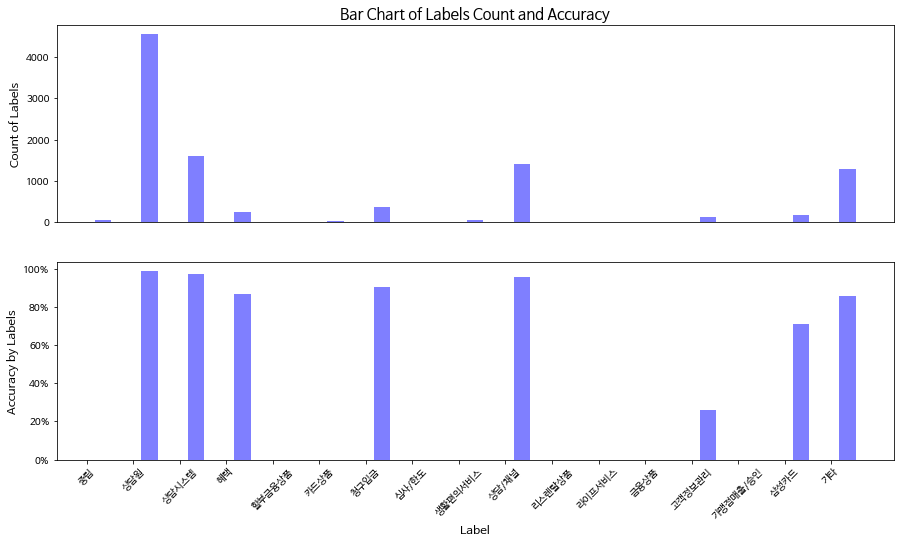

08/11/2021 09:25:15 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:25:15 - INFO - __main__ -     acc = 0.9201198202695956


{'acc': 0.9201198202695956}


08/11/2021 09:25:17 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-250


08/11/2021 09:28:14 - INFO - __main__ -   ***** Running evaluation on test dataset (500 step) *****
08/11/2021 09:28:14 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:28:14 - INFO - __main__ -     Eval Batch size = 128


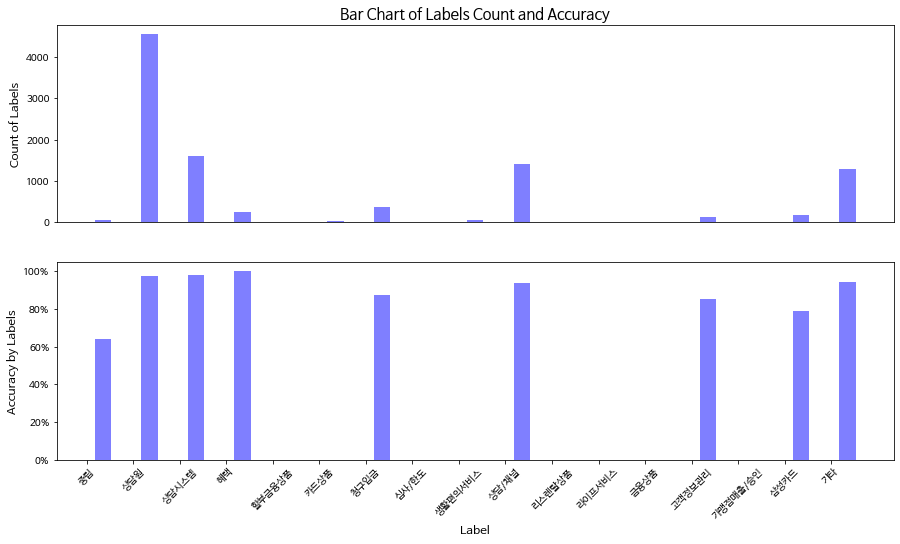

08/11/2021 09:28:36 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:28:36 - INFO - __main__ -     acc = 0.9410883674488267


{'acc': 0.9410883674488267}


08/11/2021 09:28:38 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-500


08/11/2021 09:31:34 - INFO - __main__ -   ***** Running evaluation on test dataset (750 step) *****
08/11/2021 09:31:34 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:31:34 - INFO - __main__ -     Eval Batch size = 128


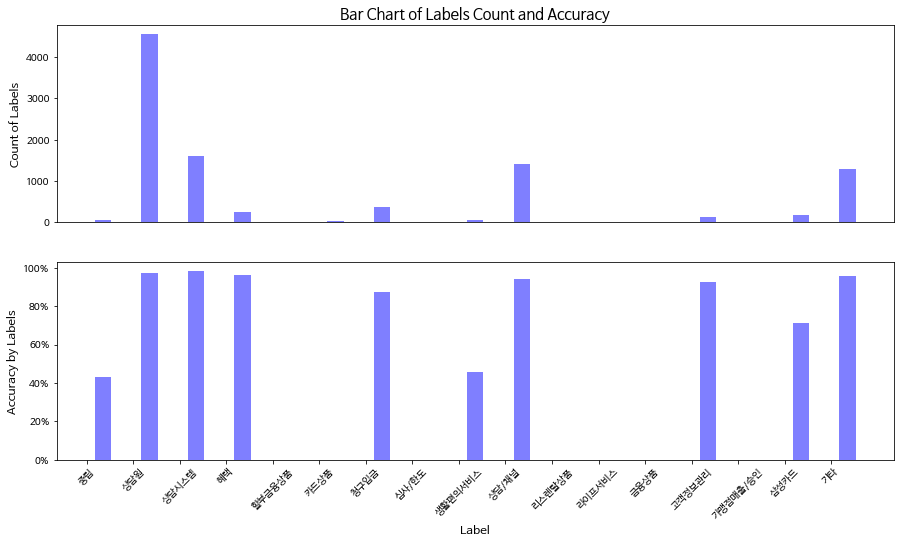

08/11/2021 09:31:56 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:31:56 - INFO - __main__ -     acc = 0.9425861208187718


{'acc': 0.9425861208187718}


08/11/2021 09:31:58 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-750


08/11/2021 09:34:55 - INFO - __main__ -   ***** Running evaluation on test dataset (1000 step) *****
08/11/2021 09:34:55 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:34:55 - INFO - __main__ -     Eval Batch size = 128


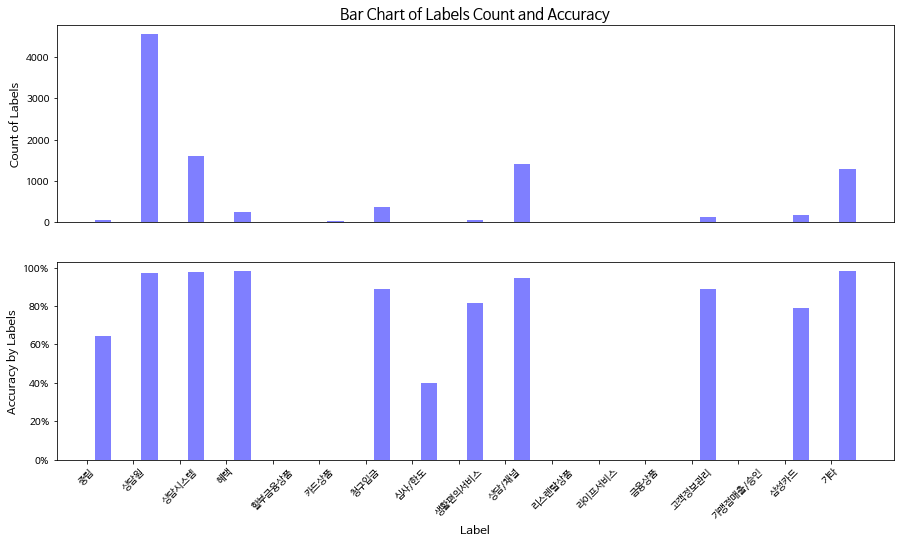

08/11/2021 09:35:17 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:35:17 - INFO - __main__ -     acc = 0.9515726410384423


{'acc': 0.9515726410384423}


08/11/2021 09:35:19 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-1000


08/11/2021 09:38:15 - INFO - __main__ -   ***** Running evaluation on test dataset (1250 step) *****
08/11/2021 09:38:15 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:38:15 - INFO - __main__ -     Eval Batch size = 128


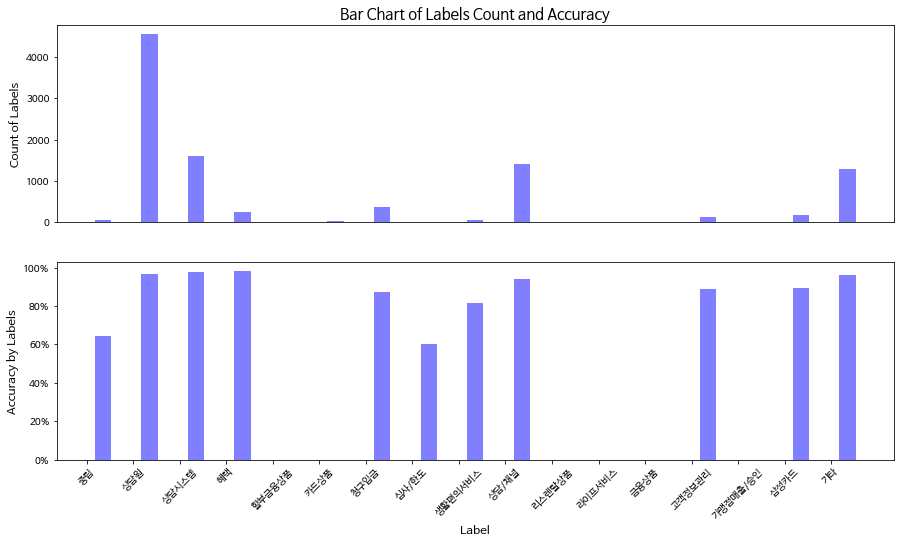

08/11/2021 09:38:36 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:38:36 - INFO - __main__ -     acc = 0.9500748876684972


{'acc': 0.9500748876684972}


08/11/2021 09:38:38 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-1250


08/11/2021 09:41:35 - INFO - __main__ -   ***** Running evaluation on test dataset (1500 step) *****
08/11/2021 09:41:35 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:41:35 - INFO - __main__ -     Eval Batch size = 128


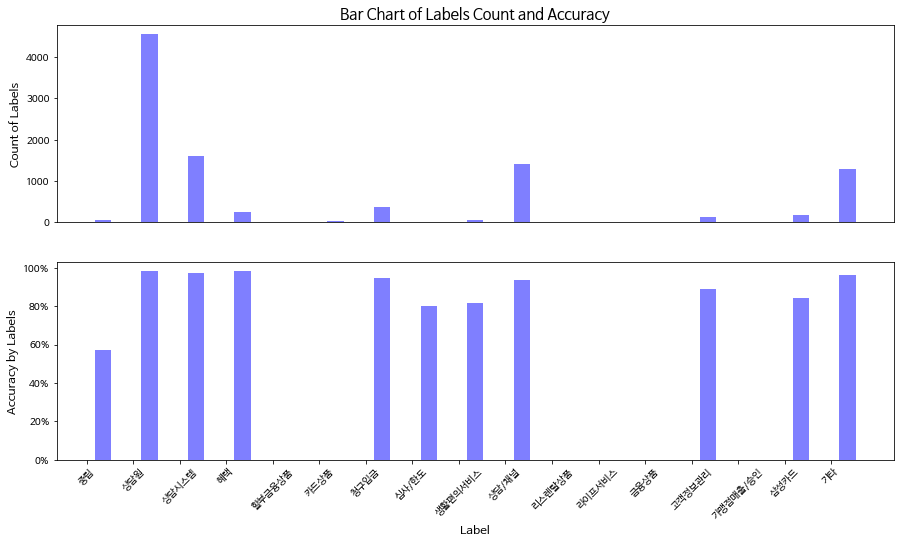

08/11/2021 09:41:57 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:41:57 - INFO - __main__ -     acc = 0.9555666500249625


{'acc': 0.9555666500249625}


08/11/2021 09:41:59 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-1500


08/11/2021 09:44:55 - INFO - __main__ -   ***** Running evaluation on test dataset (1750 step) *****
08/11/2021 09:44:55 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:44:55 - INFO - __main__ -     Eval Batch size = 128


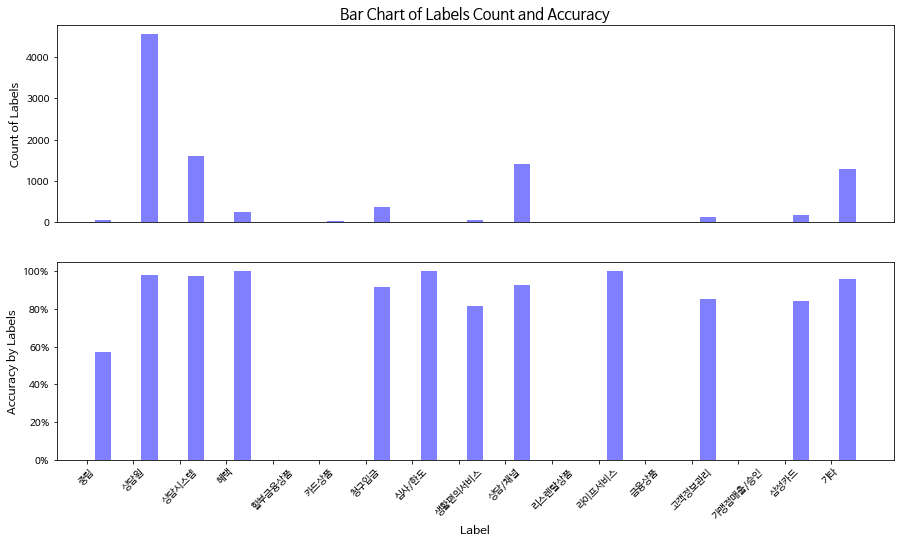

08/11/2021 09:45:16 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:45:16 - INFO - __main__ -     acc = 0.9560659011482776


{'acc': 0.9560659011482776}


08/11/2021 09:45:18 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-1750


08/11/2021 09:48:15 - INFO - __main__ -   ***** Running evaluation on test dataset (2000 step) *****
08/11/2021 09:48:15 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:48:15 - INFO - __main__ -     Eval Batch size = 128


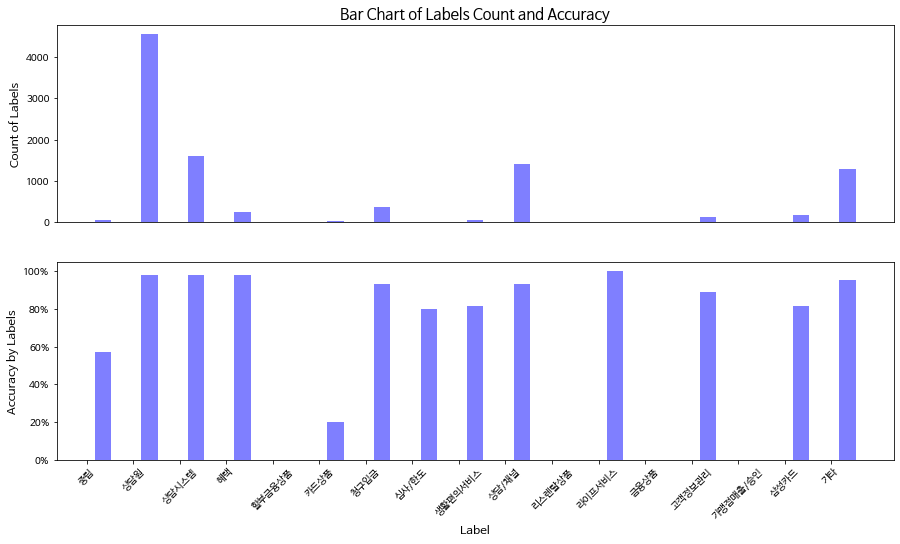

08/11/2021 09:48:36 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:48:36 - INFO - __main__ -     acc = 0.9555666500249625


{'acc': 0.9555666500249625}


08/11/2021 09:48:39 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-2000


08/11/2021 09:51:35 - INFO - __main__ -   ***** Running evaluation on test dataset (2250 step) *****
08/11/2021 09:51:35 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:51:35 - INFO - __main__ -     Eval Batch size = 128


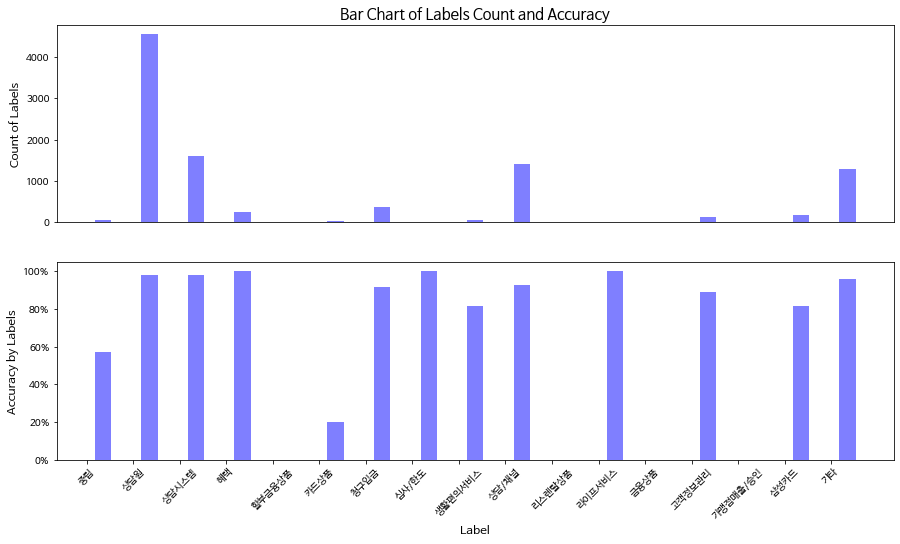

08/11/2021 09:51:56 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:51:56 - INFO - __main__ -     acc = 0.9570644033949076


{'acc': 0.9570644033949076}


08/11/2021 09:51:58 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-2250


08/11/2021 09:54:54 - INFO - __main__ -   ***** Running evaluation on test dataset (2500 step) *****
08/11/2021 09:54:54 - INFO - __main__ -     Num examples = 2003
08/11/2021 09:54:54 - INFO - __main__ -     Eval Batch size = 128


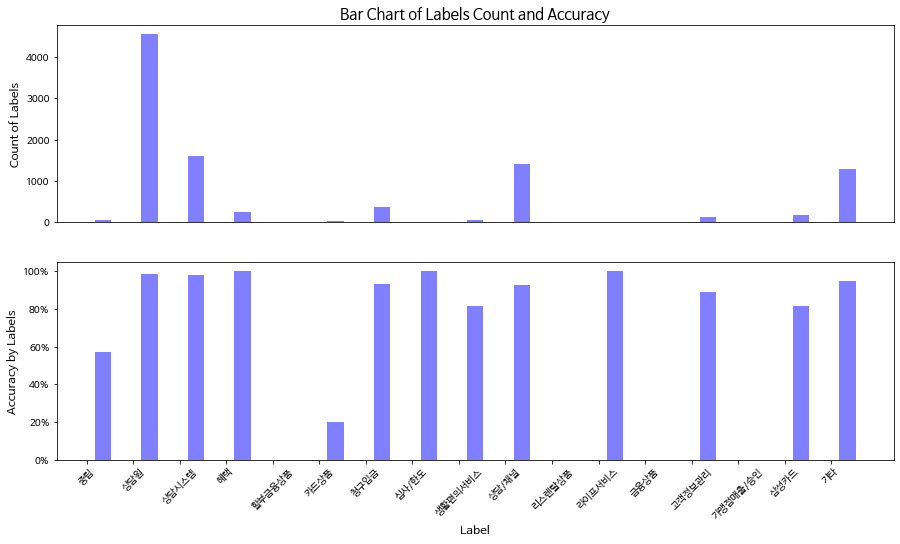

08/11/2021 09:55:16 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 09:55:16 - INFO - __main__ -     acc = 0.9570644033949076


{'acc': 0.9570644033949076}


08/11/2021 09:55:18 - INFO - __main__ -   Saving model checkpoint to koelectra-base-v3-nsmc-ckpt/checkpoint-2500
08/11/2021 09:55:18 - INFO - __main__ -    global_step = 2500, average loss = 0.12141758097189013


In [16]:
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from fastprogress.fastprogress import master_bar, progress_bar

# GPU or CPU
args.device = "cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu"
model.to(args.device)

# Train
global_step, tr_loss, full_text = train(args, model, train_dataset, test_dataset)
logger.info(" global_step = {}, average loss = {}".format(global_step, tr_loss))

08/11/2021 10:20:10 - INFO - __main__ -   Evaluate the following checkpoints: ['koelectra-base-v3-nsmc-ckpt/checkpoint-1', 'koelectra-base-v3-nsmc-ckpt/checkpoint-10', 'koelectra-base-v3-nsmc-ckpt/checkpoint-1000', 'koelectra-base-v3-nsmc-ckpt/checkpoint-11', 'koelectra-base-v3-nsmc-ckpt/checkpoint-1250', 'koelectra-base-v3-nsmc-ckpt/checkpoint-1500', 'koelectra-base-v3-nsmc-ckpt/checkpoint-1750', 'koelectra-base-v3-nsmc-ckpt/checkpoint-2', 'koelectra-base-v3-nsmc-ckpt/checkpoint-2000', 'koelectra-base-v3-nsmc-ckpt/checkpoint-2250', 'koelectra-base-v3-nsmc-ckpt/checkpoint-250', 'koelectra-base-v3-nsmc-ckpt/checkpoint-2500', 'koelectra-base-v3-nsmc-ckpt/checkpoint-3', 'koelectra-base-v3-nsmc-ckpt/checkpoint-4', 'koelectra-base-v3-nsmc-ckpt/checkpoint-5', 'koelectra-base-v3-nsmc-ckpt/checkpoint-500', 'koelectra-base-v3-nsmc-ckpt/checkpoint-6', 'koelectra-base-v3-nsmc-ckpt/checkpoint-7', 'koelectra-base-v3-nsmc-ckpt/checkpoint-750', 'koelectra-base-v3-nsmc-ckpt/checkpoint-8', 'koelectra-b

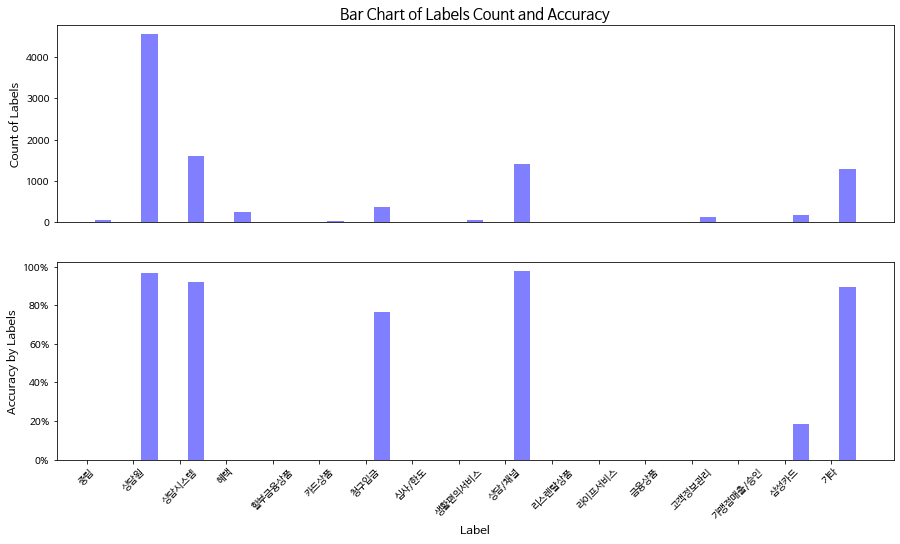

08/11/2021 10:20:35 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 10:20:35 - INFO - __main__ -     acc = 0.8701947079380928


                                              Review  Label Prediction
0  삼성카드 택배 배달 시 사전 전화 약속하고 카드 배달하세요 기본 아닙니까 집에서 작...   카드상품        상담원
1  홈페이지를 이용할 경우 오류가 잦아 매우 불편함 전화 문의는 대기 시간이 오래 걸려...  상담시스템      상담/채널
2  상담원과의 통화대기시간안내가 현실적으로 차이가 있을 때입니다 대기시간이 1시간 정도...  상담시스템      상담/채널
3                                 상담원 연결까지 너무 오랴 걸려요  상담시스템      상담/채널
4                4번과 5번은 크게 의미 없는데 다음단게로 넘어가기 위한 클릭임    상담원      상담/채널
{'acc': 0.8701947079380928}


KeyboardInterrupt: ignored

In [27]:
results = {}
checkpoints = list(
            os.path.dirname(c) for c in
            sorted(glob.glob(args.output_dir + "/**/" + "pytorch_model.bin", recursive=True))
        )
if not args.eval_all_checkpoints:
    checkpoints = checkpoints[-1:]
else:
    logging.getLogger("transformers.configuration_utils").setLevel(logging.WARN)  # Reduce logging
    logging.getLogger("transformers.modeling_utils").setLevel(logging.WARN)  # Reduce logging
logger.info("Evaluate the following checkpoints: %s", checkpoints)
for checkpoint in checkpoints:
    global_step = checkpoint.split("-")[-1]
    model = args.model.from_pretrained(checkpoint)
    model.to(args.device)
    result = evaluate(args, model, full_text, test_dataset, mode="test", global_step=global_step)
    result = dict((k + "_{}".format(global_step), v) for k, v in result.items())
    results.update(result)

output_eval_file = os.path.join(args.output_dir, "eval_results.txt")
with open(output_eval_file, "w") as f_w:
    for key in sorted(results.keys()):
        f_w.write("{} = {}\n".format(key, str(results[key])))

In [22]:
# 수정금지: 타임스탬프
_model_build_end_time = printt("Model building: Start")
print(_model_build_end_time - _model_build_start_time)

NameError: ignored

#모델 분류

In [ ]:
# 수정금지: 타임스탬프
_test_start_time = printt("TEST: Start")

In [ ]:
#TODO: 해당 블럭에 테스트 수행을 위한 코드를 넣으세요. (시간측정 구간)
#분석 파일은 tsv 파일로 제공되며, 제공되는 학습데이터 파일과 동일한 레이아웃(단, 정답 분류 =공백)으로 제공됩니다.




In [ ]:
# 수정금지: 타임스탬프
_test_end_time = printt("Model building: Start")
print(_test_end_time - _test_start_time)

# 결과출력

In [ ]:
#TODO:해당 블럭에 테스트 결과를 파일로 저장하는 코드를 넣으세요. (시간측정 제외)
#저장 파일은tsv 파일로 제공되는 학습데이터 파일과 동일한 레이아웃(단, 정답 분류 = 테스트 결과 도출된 양식)으로 저장


